请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import graphviz

In [2]:
# 加载数据集
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print(x)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [4]:
# 定义决策树模型，采用10折交叉验证
model_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
acc_score_dtc = cross_val_score(model_dtc,x,y,cv=10,scoring='accuracy') # 准确率
precision_score_dtc = cross_val_score(model_dtc,x,y,cv=10,scoring='precision')  # 精确率
recall_score_dtc = cross_val_score(model_dtc,x,y,cv=10,scoring='recall')  # 召回率

In [5]:
acc_score_dtc

array([0.7012987 , 0.72727273, 0.68831169, 0.67532468, 0.75324675,
       0.81818182, 0.71428571, 0.79220779, 0.76315789, 0.75      ])

In [6]:
# 可视化决策树的结构
feature_name = data.columns.values[:-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
model_dtc.fit(x_train,y_train)
dot_data = tree.export_graphviz(model_dtc
                                ,out_file= None
                                ,feature_names = feature_name
                                ,class_names=['class_0','class_1']
                                ,filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

In [7]:
# 创建随机森林对象
rfClassifier = RandomForestClassifier()

# 网络搜索的模型候选参数，即随机森林的候选参数
paramGrid = dict(
    max_depth = [1,2,3,4,5],             # 最大数深度候选值
    criterion = ["gini","entropy"],      # 评选节点分裂的候选标准
    max_leaf_nodes = [3,4,5,6,7,8],      # 最大叶子数候选值
    n_estimators = [10,50,100,150,200]   # 森林中树的候选数量
)

In [8]:
# 创建网络搜索对象
gridSearchCV = GridSearchCV(
    rfClassifier,param_grid=paramGrid,
    cv=10,verbose=1,n_jobs=2,scoring=make_scorer(accuracy_score)
)

In [9]:
# 开始进行网络搜索，寻找最优参数
grid = gridSearchCV.fit(x,y)
print(grid.best_score_)   # 打印最优准确率得分
print(grid.best_params_)  # 打印最优超参数

# 得到最优超参数：'max_depth': 3, 'max_leaf_nodes': 8, 'n_estimators': 150

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 128 tasks      | elapsed:    8.3s
[Parallel(n_jobs=2)]: Done 728 tasks      | elapsed:   49.8s
[Parallel(n_jobs=2)]: Done 1728 tasks      | elapsed:  2.0min


0.7682672590567327
{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 7, 'n_estimators': 100}


[Parallel(n_jobs=2)]: Done 3000 out of 3000 | elapsed:  3.7min finished


In [10]:
trees = []   # 存放树的数量
errs = []    # 存放错误率
accs = []    # 准确率

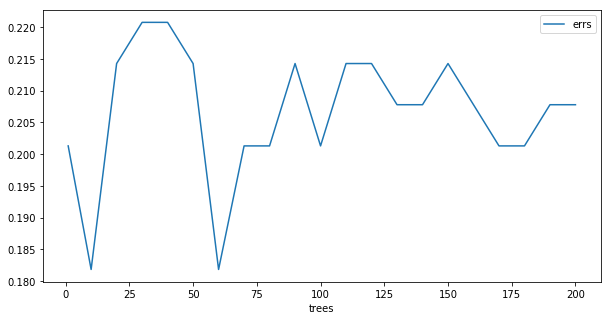

In [11]:
# 划分训练集喝测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
t_num = list(range(0,200,10))
t_num = [i+10 for i in t_num]
t_num = list([1]+t_num)
for t in t_num:
    trees.append(t)
    # 创建随机森林
    rfClassifier = RandomForestClassifier(max_depth=3,max_leaf_nodes=8,criterion="gini",n_estimators=t)
    # 使用训练集训练模型
    rfClassifier.fit(x_train,y_train)
    # 使用训练后的模型进行预测
    y_test_predict = rfClassifier.predict(x_test)
    # 计算准确率
    acc = accuracy_score(y_true=y_test,y_pred=y_test_predict)
    # 准确率
    accs.append(acc)
    # 计算错误率
    err = 1-acc
    errs.append(err)
    
df = pd.DataFrame({
    "trees":trees,
    "errs":errs,
    "accs":accs
})

df.plot(x="trees",y="errs",figsize=(10,5))

In [12]:
print("随机森林准确率：",acc)
print("决策树准确率：",acc_score_dtc.mean())


随机森林准确率： 0.7922077922077922
决策树准确率： 0.7383287764866713
